# Model to predict the number of users

- Here the number of users(target_address) is predicted per source

In [34]:
import pandas as pd
import pymysql
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
def connect_to_mysql():
    connection = pymysql.connect(host='10.65.47.80',
                            port=4589,
                            user='netsight',
                            password='Enterasys',
                            db='netsightrpt',
                            charset='utf8',
                            cursorclass=pymysql.cursors.DictCursor)
    return connection

conn=connect_to_mysql()

In [3]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

def plot_test(x,y,title1):
    #label = data.index[0:len(compare_train)]
    label1=x
    #py.init_notebook_mode
        

    # Create a trace
    
    trace1 = go.Scatter(
        x = label1,
        y = np.array(y),
        name ='Actual',
        mode = 'lines+markers'
    
        )


    # Edit the layout
    layout = dict(title = title1,
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'user_count'),
              )
    

    data = [trace1]
    fig = dict(data=data, layout=layout)
    fig =go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='basic-line')
    #py.iplot(fig, filename='jupyter/basic_bar')
  

In [4]:
def plot_test1(x,y,y2,title1):
    #label = data.index[0:len(compare_train)]
    label1=x
    #py.init_notebook_mode
        

    # Create a trace
    
    trace1 = go.Scatter(
        x = label1,
        y = np.array(y),
        name ='Actual',
        mode = 'lines+markers'
    
        )
    
    trace2 = go.Scatter(
        x = label1,
        y = np.array(y2),
        name ='Predicted',
        mode = 'lines+markers'
    
        )



    # Edit the layout
    layout = dict(title = title1,
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'user_count'),
              )
    

    data = [trace1,trace2]
    fig = dict(data=data, layout=layout)
    fig =go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='basic-line')

### 1. Fetching data

In [ ]:
with conn.cursor() as cursor:
        # Read a  record
        sql = "select count(distinct target_address) as user_count, time_stamp, source from appid_datapoint group by source, time_stamp" 
        cursor.execute(sql)
        user_count_df = pd.DataFrame(cursor.fetchall())

In [4]:
user_count_df = pd.read_csv('user_count_per_source_dataset.csv')

In [ ]:
user_count_df.to_csv('user_count_per_source_dataset.csv',index=False)

In [12]:
user_count_df.sort_values(by='user_count',ascending=False)

,source,time_stamp,user_count
time_stamp,,,
2017-12-04 14:00:00,134.141.5.104,1512396000000,25000
2017-12-04 14:00:00,10.6.1.101,1512396000000,25000
2018-02-01 19:00:00,10.6.1.101,1517511600000,25000
2018-02-01 19:00:00,134.141.5.104,1517511600000,25000
2017-12-04 19:00:00,134.141.5.104,1512414000000,25000
2017-12-04 20:00:00,134.141.5.104,1512417600000,11013
2018-01-29 19:00:00,134.141.5.104,1517252400000,9729
2018-01-17 16:00:00,134.141.5.104,1516204800000,8022
2018-01-24 19:00:00,134.141.5.104,1516820400000,7823


In [10]:
user_count_df.source.value_counts()

134.141.5.104      1930
134.141.208.230    1910
10.6.1.101         1874
134.141.121.91     1869
134.141.5.102      1708
134.141.115.101    1138
134.141.224.29      406
Name: source, dtype: int64

In [11]:
dates = user_count_df.time_stamp.astype(int)
dates_outlook =pd.to_datetime(pd.Series(dates),unit='ms')
user_count_df.index = dates_outlook
user_count_df.shape

(10835, 3)

In [42]:
dates_outlook[0:5]

time_stamp
2017-11-11 00:00:00   2017-11-11 00:00:00
2017-11-11 01:00:00   2017-11-11 01:00:00
2017-11-11 02:00:00   2017-11-11 02:00:00
2017-11-11 03:00:00   2017-11-11 03:00:00
2017-11-11 04:00:00   2017-11-11 04:00:00
Name: time_stamp, dtype: datetime64[ns]

### Prophet model

In [35]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as mse
import math
from tqdm import tqdm
#z1.index = z1.date
def create_prophet_m(source_name,z1):
    
  
    ### --- For realtime pred ---###
    
    full_df = z1.user_count.iloc[0:len(z1)]
    full_df = full_df.reset_index()
    full_df.columns = ['ds','y']
    
    #-- Realtime prediction --##
    #model 
    model_r = Prophet(yearly_seasonality=False,changepoint_prior_scale=.2)
    model_r.fit(full_df)
    future_r = model_r.make_future_dataframe(periods=24,freq='H')
    forecast_r = model_r.predict(future_r)
    forecast_r.index = forecast_r['ds']
    #forecast 
    pred_r = pd.DataFrame(forecast_r['yhat'][len(z1):(len(z1)+24)])
    pred_r=pred_r.reset_index()
    #--- completes realtime pred ---#
    
    #train_end_index=int(0.7*len(data_l_ew_g1.app_rsp_time))
    train_end_index=len(z1.user_count)-24
    train_df=z1.user_count.iloc[0:train_end_index]
    #train_df= train_df[train_df<cutter]
    
    
    test_df=z1.user_count.iloc[train_end_index:len(z1)]
    
    
    
    train_df=train_df.reset_index()
    test_df=test_df.reset_index()
    train_df.columns=['ds','y']
   
    test_df.columns=['ds','y']
    
    
    #model 
    model = Prophet(yearly_seasonality=False,changepoint_prior_scale=.2)
    model.fit(train_df)
    future = model.make_future_dataframe(periods=len(test_df),freq='H')
    forecast = model.predict(future)
    forecast.index = forecast['ds']
    #forecast 
    pred = pd.DataFrame(forecast['yhat'][train_end_index:len(z1)])
    pred=pred.reset_index()
    pred_df=pd.merge(test_df,pred,on='ds',how='left')
    pred_df.dropna(inplace=True)
    
    df=pd.DataFrame()
    
    if(len(pred_df)>0):
        
        pred_df['error_test']=pred_df.y-pred_df.yhat
    
        
    
       
        MSE=mse(pred_df.y,pred_df.yhat)
        RMSE=math.sqrt(MSE)
        pred_df['APE']=abs(pred_df.error_test*100/pred_df.y)
        MAPE=pred_df.APE.mean()
        print("App name:",source_name)
        print("MSE  :",MSE)
        print("RMSE :",RMSE)
        print("MAPE :",MAPE)
        #print("RMSE from mean :",mean_RMSE)
        #print("MAPE from mean :",mean_MAPE)
    
        #print(pred_df.head())
        q98=pred_df['APE'].quantile(0.98)
        mape_q98=pred_df['APE'][pred_df.APE<pred_df['APE'].quantile(0.98)].mean()

        df = pd.DataFrame({'length':len(z1),#'predicted_t':[forcast_lag],
                             'test_rmse':RMSE,
                             'test_mape':MAPE,
                 
                 'test_mape_98':mape_q98},
                      #'rmse_by_mean':mean_RMSE,
                      #'mape_by_mean':mean_MAPE}
                          index=[source_name])

    return(df,model,forecast,pred_df,pred_r)

### Examples

#### 1.

In [36]:
s = '10.6.1.101'
user_count_df_1s = user_count_df[(user_count_df.source==s)]
plot_test(user_count_df_1s.index,user_count_df_1s.user_count,s)

In [38]:
ew_prophet,ew_model,ew_forcast,ew_pred_df,pred_r=(create_prophet_m((s),user_count_df_1s))

/root/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



App name: 10.6.1.101
MSE  : 816519.9553613368
RMSE : 903.6149375488084
MAPE : 15.284801269696509


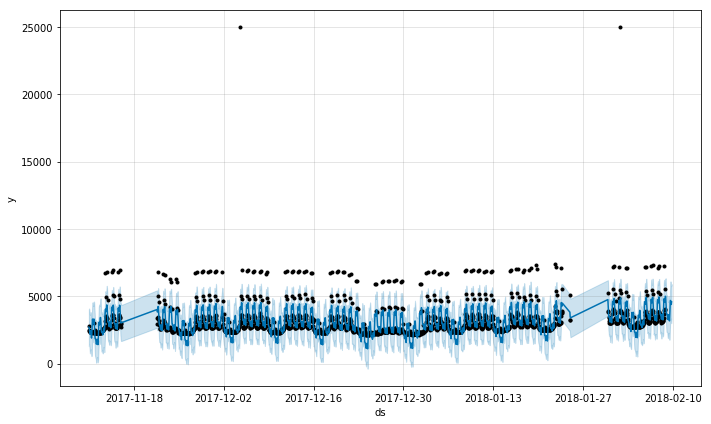

In [39]:
ew_model.plot(ew_forcast)

#### 2.

### For all combinations

In [40]:
s_list = user_count_df.source.unique()
prophet_df = pd.DataFrame()
prophet_analysis_df = pd.DataFrame()
prophet_future_df = pd.DataFrame()
temp = user_count_df.copy()
for i in tqdm(range(0,len(s_list))):
    s = s_list[i]
    temp2 = temp[temp.source==s]
    
        
    if(len(temp2)<=1400):
        continue
    ew_prophet,ew_model,ew_forcast,ew_pred_df,pred_r =(create_prophet_m(s,temp2))
    
    
    ew_pred_df['source'] = s
        
    ew_prophet['source'] = s
    pred_r['source'] = s
    
    prophet_df = prophet_df.append(ew_pred_df)  
    prophet_analysis_df = prophet_analysis_df.append(ew_prophet)
    prophet_future_df = prophet_future_df.append(pred_r)

  0%|          | 0/7 [00:00<?, ?it/s]/root/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

 14%|█▍        | 1/7 [00:10<01:02, 10.35s/it]

App name: 10.6.1.101
MSE  : 816519.9553613368
RMSE : 903.6149375488084
MAPE : 15.284801269696509


 43%|████▎     | 3/7 [00:22<00:30,  7.66s/it]

App name: 134.141.121.91
MSE  : 1760.7989520818562
RMSE : 41.961874982915816
MAPE : 4.558598660767987


 57%|█████▋    | 4/7 [00:35<00:26,  8.76s/it]

App name: 134.141.208.230
MSE  : 2343.6593784239717
RMSE : 48.411355882932796
MAPE : 7.142901779056074


 86%|████████▌ | 6/7 [00:48<00:08,  8.10s/it]

App name: 134.141.5.102
MSE  : 58440.89566221568
RMSE : 241.74551839117035
MAPE : 22.2114520466758


100%|██████████| 7/7 [00:59<00:00,  8.53s/it]

App name: 134.141.5.104
MSE  : 118982.54060278596
RMSE : 344.9384591529132
MAPE : 3.385455026130407


In [41]:
prophet_analysis_df.to_csv('user_count_analysis_per_source_data.csv',index=False)
prophet_df.to_csv('user_count_evaluation_per_source_data.csv',index=False)
prophet_future_df.to_csv('user_count_forecast_per_source_data.csv',index=False)

In [28]:
prophet_analysis_df

,length,test_mape,test_mape_98,test_rmse,source
10.6.1.101,1874,15.284801,14.433473,903.614938,10.6.1.101
134.141.121.91,1869,4.558599,4.354103,41.961875,134.141.121.91
134.141.208.230,1910,7.142902,6.945170,48.411356,134.141.208.230
134.141.5.102,1708,22.211452,20.919275,241.745518,134.141.5.102
134.141.5.104,1930,3.385455,2.919160,344.938459,134.141.5.104


In [2]:
import pandas as pd
my = pd.read_csv('p8/user_count_analysis_per_source_data.csv')
my

,length,test_mape,test_mape_98,test_rmse,source
0,1910,7.142902,6.945170,48.411356,134.141.208.230
1,1874,15.284801,14.433473,903.614938,10.6.1.101
2,1930,3.385455,2.919160,344.938459,134.141.5.104
3,1869,4.558599,4.354103,41.961875,134.141.121.91
4,1708,22.211452,20.919275,241.745518,134.141.5.102


#### Plots

In [29]:
tt = prophet_df[prophet_df.source=='10.6.1.101']
plot_test1(tt.ds,tt.y,tt.yhat,'10.6.1.101')

In [30]:
tt = prophet_df[prophet_df.source=='134.141.121.91']
plot_test1(tt.ds,tt.y,tt.yhat,'134.141.121.91')

In [31]:
tt = prophet_df[prophet_df.source=='134.141.5.102']
plot_test1(tt.ds,tt.y,tt.yhat,'134.141.5.102')

In [32]:
tt = prophet_df[prophet_df.source=='134.141.208.230']
plot_test1(tt.ds,tt.y,tt.yhat,'134.141.208.230')

In [33]:
tt = prophet_df[prophet_df.source=='134.141.5.104']
plot_test1(tt.ds,tt.y,tt.yhat,'134.141.5.104')

### Parallel processing

In [1]:
from pyspark.sql import SQLContext
import pandas as pd
import pymysql
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import logging
from tqdm import tqdm
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as mse
import math

## Logging ##

import os
import sys


from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import os
import pandas as pd

from pyspark.sql import SparkSession
import datetime
full_t1 = datetime.datetime.now()
# initialise sparkContext
spark1 = SparkSession.builder \
    .master('local') \
    .appName('p7_sample') \
    .config('spark.executor.memory', '24gb') \
    .config("spark.cores.max", "16") \
    .getOrCreate()

sc = spark1.sparkContext

# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


In [14]:
df = sqlContext.read.parquet('appid_datapoint_parquet1')

import datetime
t1 = datetime.datetime.now()

df2 = pd.DataFrame()
#for s in tqdm(s_list):
#df_t = df[df.source==s]
df1 = df.registerTempTable('dummy')
df1 = sqlContext.sql('select count(distinct target_address) as user_count, time_stamp, source from dummy group by source, time_stamp')

dff=df1.toPandas()
        
dates_outlook = pd.to_datetime(pd.Series(dff.time_stamp),unit='ms')
        

dff.index = dates_outlook
    
dff = dff.sort_values(by='time_stamp')
#dff['source']=s
df2 = df2.append(dff)
t2 = datetime.datetime.now()

print((str(t2-t1)))

0:00:34.451825


In [10]:
df[(df.source=='10.6.1.101') & (df.time_stamp==1518184800000)].select('target_address').distinct().count()

7191

In [9]:
user_count_df[user_count_df.source=='10.6.1.101'].tail()

,source,time_stamp,user_count
1869,10.6.1.101,1518184800000,7191
1870,10.6.1.101,1518188400000,3836
1871,10.6.1.101,1518192000000,3786
1872,10.6.1.101,1518195600000,5366
1873,10.6.1.101,1518199200000,3873


In [ ]:
from joblib import Parallel, delayed


def forsource(s,temp):
    
    temp2 = temp[temp.source==s]
    prophet_future_df = pd.DataFrame()
    prophet_analysis_df = pd.DataFrame()
    prophet_df = pd.DataFrame()
        
    if(len(temp2)>1400):
        
        prophet_analysis_df,p_model,p_forcast,prophet_df,prophet_future_df=(create_prophet_m(s,temp2,24))
    
        prophet_future_df['source']=s
    
        prophet_analysis_df['source'] = s
        
        prophet_df['source'] = s
        #prophet_df.to_csv('parallel_test/eval_'+s+'.csv')
        #prophet_analysis_df.to_csv('parallel_test/analysis_'+s+'.csv')
        #prophet_future_df.to_csv('parallel_test/forecast_'+s+'.csv')
    
    return  prophet_df, prophet_analysis_df, prophet_future_df
        

In [ ]:
s_list = user_count_df.source.unique()

pool = Parallel(n_jobs=-1,verbose=5,pre_dispatch='all')
r0  = pool(delayed(forsource)(s,user_count_df) for s in s_list)

In [ ]:
prophet_df = pd.DataFrame()
prophet_future_df = pd.DataFrame()
prophet_analysis_df = pd.DataFrame()
for i in range(0,len(r0)):
    prophet_df = prophet_df.append(r0[i][0])
    prophet_analysis_df = prophet_analysis_df.append(r0[i][1])
    prophet_future_df = prophet_future_df.append(r0[i][2])